# CIFAR-10 Dataset

The CIFAR-10 dataset is a widely used benchmark in the field of computer vision and machine learning. It was developed by researchers at the Canadian Institute For Advanced Research (CIFAR). The dataset consists of **60,000** **32×32** pixel color photographs of objects from **10** different classes. The class labels and their associated integer values are as follows:


<img src="https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png" style="max-width:480px">


These images are relatively small, much smaller than typical photographs, making them suitable for computer vision research.

CIFAR-10 has become a well-understood dataset and is commonly used for benchmarking computer vision algorithms. The problem is considered "solved," with it being relatively straightforward to achieve an 80% classification accuracy. The highest performance on this dataset is achieved by employing deep learning convolutional neural networks, which can achieve a classification accuracy exceeding 90% on the test dataset.


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


100%|██████████| 170498071/170498071 [00:07<00:00, 23861142.83it/s]


Extracting ./CIFAR10/train/cifar-10-python.tar.gz to ./CIFAR10/train


100%|██████████| 170498071/170498071 [00:06<00:00, 24402015.80it/s]


Extracting ./CIFAR10/test/cifar-10-python.tar.gz to ./CIFAR10/test


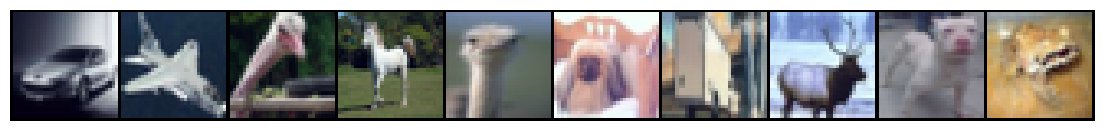

automobile airplane bird horse bird dog truck deer dog frog 

In [ ]:
#Defining plotting settings
plt.rcParams['figure.figsize'] = 14, 6

mean = [0.4914, 0.4822, 0.4465]
std = [0.2470, 0.2435, 0.2616]

#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean = mean,
                                     std = std)])

#Downloading the CIFAR10 dataset into train and test sets
train_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/train", train=True,
    transform=normalize_transform,
    download=True)



test_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/test", train=False,
    transform=normalize_transform,
    download=True)

# Get the indices of samples in the dataset
indices = list(range(len(test_dataset)))

# Split the indices into validation and testing sets
val_indices, test_indices = train_test_split(indices, test_size=0.5, random_state=42)



#Generating data loaders from the corresponding datasets
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)  # MMMR --- Shuffle needs to be true.

# Create DataLoader for validation set
val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)
validation_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, sampler=val_sampler)

# Create DataLoader for testing set
test_sampler = torch.utils.data.SubsetRandomSampler(test_indices)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, sampler=test_sampler)
#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

#Plotting 10 images from the 1st batch
dataiter = iter(train_loader)
images, labels = next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(
  images[:10], normalize=True, padding=1, nrow=10).numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()

# Printing Labels
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
labels_now = labels[:10]
for x in labels_now.tolist():
  print(label_names[x], end=" ")

Define a Convolutional Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5, padding='same')
        self.bn1 = nn.BatchNorm2d(8)

        self.conv2 = nn.Conv2d(8, 16, 5, padding='same')
        self.bn2 = nn.BatchNorm2d(16)

        self.conv3 = nn.Conv2d(16, 32, 5, padding='same')
        self.bn3 = nn.BatchNorm2d(32)

        self.fc1 = nn.Linear(32 * 4 * 4, 128)

        self.fc2 = nn.Linear(128, 64)

        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.bn1(self.relu(self.conv1(x))))
        x = self.pool(self.bn2(self.relu(self.conv2(x))))
        x = self.pool(self.bn3(self.relu(self.conv3(x))))
        # print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


net = Net().to(device)

In [ ]:
print(net)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
from torchsummary import summary
summary(net,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             608
              ReLU-2            [-1, 8, 32, 32]               0
       BatchNorm2d-3            [-1, 8, 32, 32]              16
         MaxPool2d-4            [-1, 8, 16, 16]               0
            Conv2d-5           [-1, 16, 16, 16]           3,216
              ReLU-6           [-1, 16, 16, 16]               0
       BatchNorm2d-7           [-1, 16, 16, 16]              32
         MaxPool2d-8             [-1, 16, 8, 8]               0
            Conv2d-9             [-1, 32, 8, 8]          12,832
             ReLU-10             [-1, 32, 8, 8]               0
      BatchNorm2d-11             [-1, 32, 8, 8]              64
        MaxPool2d-12             [-1, 32, 4, 4]               0
           Linear-13                  [-1, 128]          65,664
          Dropout-14                  [

Define a Loss function and optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train the network

In [ ]:
train_loss_history=[]
test_loss_history=[]
start_time = time.time()
for epoch in range(30):  # loop over the dataset multiple times

    running_train_loss = 0.0

    for data in train_loader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_train_loss += loss.item()

    running_valid_loss=0
    for data in validation_loader:
        with torch.no_grad():
            inputs, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_valid_loss += loss.item()
    print(f'[{epoch + 1}] training_loss: {running_train_loss / len(train_loader):.3f} validation_loss: {running_valid_loss / len(validation_loader):.3f}')

    train_loss_history.append(running_train_loss/len(train_loader))
    test_loss_history.append(running_valid_loss/len(validation_loader))


print('Finished Training')
end_time = time.time()
training_time = end_time - start_time
print("Total training time: {:.2f} seconds".format(training_time))


[1] training_loss: 2.156 validation_loss: 1.960
[2] training_loss: 1.838 validation_loss: 1.731
[3] training_loss: 1.669 validation_loss: 1.600
[4] training_loss: 1.557 validation_loss: 1.532
[5] training_loss: 1.471 validation_loss: 1.443
[6] training_loss: 1.400 validation_loss: 1.359
[7] training_loss: 1.334 validation_loss: 1.348
[8] training_loss: 1.288 validation_loss: 1.274
[9] training_loss: 1.246 validation_loss: 1.263
[10] training_loss: 1.207 validation_loss: 1.233
[11] training_loss: 1.172 validation_loss: 1.221
[12] training_loss: 1.150 validation_loss: 1.219
[13] training_loss: 1.118 validation_loss: 1.191
[14] training_loss: 1.091 validation_loss: 1.185
[15] training_loss: 1.061 validation_loss: 1.139
[16] training_loss: 1.042 validation_loss: 1.134
[17] training_loss: 1.031 validation_loss: 1.183
[18] training_loss: 1.007 validation_loss: 1.118
[19] training_loss: 0.989 validation_loss: 1.084
[20] training_loss: 0.970 validation_loss: 1.102
[21] training_loss: 0.950 val

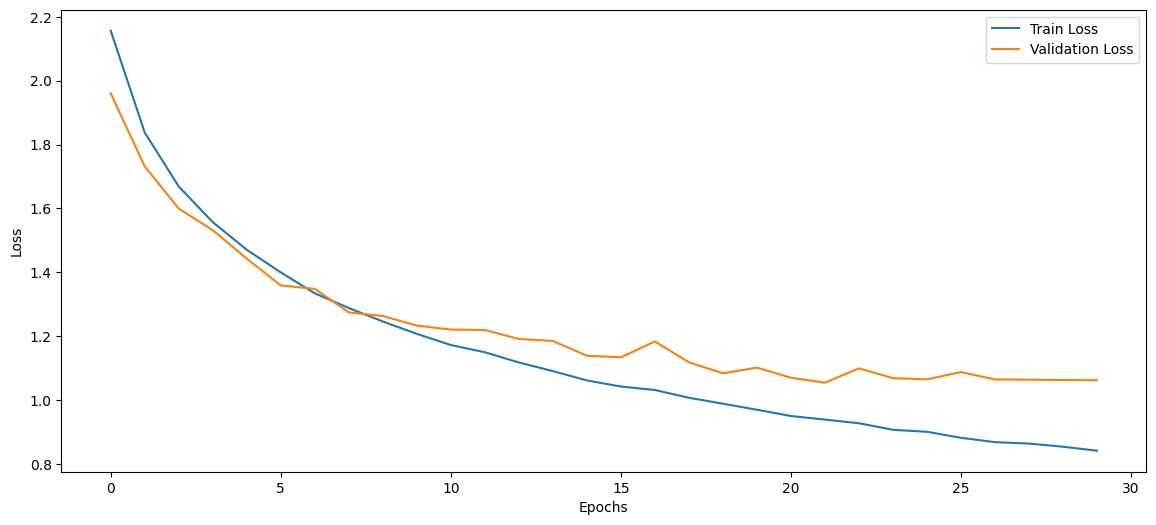

In [ ]:
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let’s quickly save our trained model:

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Test the network on the test data

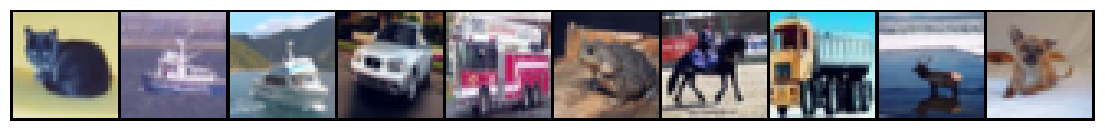

cat ship ship automobile truck frog horse truck deer dog 

In [ ]:
# print images
dataiter = iter(validation_loader)
images, labels = next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(
images[:10], normalize=True, padding=1, nrow=10).numpy(), (1, 2, 0)))
plt.axis('off')
plt.show()
labels_now = labels[:10]
for x in labels_now.tolist():
  print(label_names[x], end=" ")

In [ ]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images.to(device))

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{label_names[predicted[j]]:5s}'
                              for j in range(10)))

Predicted:  cat   ship  ship  automobile truck cat   horse truck airplane cat  


Let us look at how the network performs on the whole dataset.

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 65 %


what are the classes that performed well, and the classes that did not perform well:

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in label_names}
total_pred = {classname: 0 for classname in label_names}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[label_names[label]] += 1
            total_pred[label_names[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 72.0 %
Accuracy for class: automobile is 81.3 %
Accuracy for class: bird  is 47.6 %
Accuracy for class: cat   is 42.2 %
Accuracy for class: deer  is 56.7 %
Accuracy for class: dog   is 55.4 %
Accuracy for class: frog  is 74.0 %
Accuracy for class: horse is 73.1 %
Accuracy for class: ship  is 79.1 %
Accuracy for class: truck is 73.7 %
